In [3]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, validation_curve
import numpy as np
import matplotlib.pyplot as plt
import time 

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size=0.7)

# 다층 퍼셉트론을 교차검증으로 성능 평가(소요 시간 측정 포함)
start = time.time() # 시작 시각

mlp = MLPClassifier(learning_rate_init=0.001, batch_size=32, max_iter=300, solver='sgd')
prange = range(50, 1001, 50)   # 50에서 시작하여 50씩 증가시키면서 1000까지 조사

train_score, test_score = validation_curve(mlp, x_train, y_train, 
                                           param_name='hidden_layer_sizes',
                                           param_range=prange,
                                           cv=10,               # 10겹 교차 검증으로 성능 측정
                                           scoring='accuracy',
                                           n_jobs=4)    # 코어 4개를 사용하여 병렬처리

end = time.time()   # 끝난 시각

print('하이퍼 매개변수 최적화에 걸린 시간은', end-start, '초 입니다.')

하이퍼 매개변수 최적화에 걸린 시간은 621.5181796550751 초 입니다.


In [4]:
# 교차 검증 결과의 평균과 분산 구하기

train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)

test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

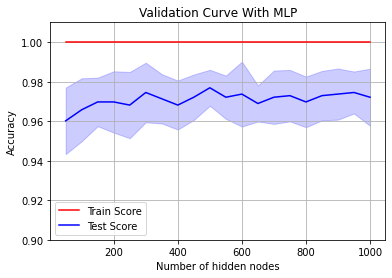


최적의 은닉층의 노드 개수는 500 개 입니다.



In [5]:
# 성능 그래프 그리기

plt.plot(prange, train_mean, label='Train Score', color='r')
plt.plot(prange, test_mean, label='Test Score', color='b')
plt.fill_between(prange, train_mean-train_std, train_mean+train_std, alpha=0.2, color='r')
plt.fill_between(prange, test_mean-test_std, test_mean+test_std, alpha=0.2, color='b')
plt.legend(loc='best')
plt.title('Validation Curve With MLP')
plt.xlabel('Number of hidden nodes')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.01)
plt.grid(axis='both')
plt.show()

best_number_nodes = prange[np.argmax(test_mean)]    # 최적의 은닉 노드 개수
print('\n최적의 은닉층의 노드 개수는', best_number_nodes, '개 입니다.\n')

In [6]:
# 최적의 은닉 노드 개수로 모델링
mlp_test = MLPClassifier(hidden_layer_sizes=(best_number_nodes), 
                         learning_rate_init=0.001,
                         batch_size=32,
                         max_iter=300,
                         solver='sgd')
mlp_test.fit(x_train, y_train)

# 테스트 집합으로 예측
res=mlp_test.predict(x_test)


In [7]:
# 혼동 행렬

conf = np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)



[[53.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 55.  1.  0.  0.  0.  0.  0.  2.  0.]
 [ 0.  0. 55.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 51.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 53.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 55.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0. 55.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 46.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. 57.  1.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0. 52.]]


In [8]:
# 정확률 계산

no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy = no_correct/len(res)
print('테스트 집합에 대한 정확률은', accuracy*100, '%입니다.')

테스트 집합에 대한 정확률은 98.51851851851852 %입니다.
